# Game of Life

We are going to play on an nxn integer matrix with a 1 deep border of permanently dead cells around the outside. The total size of the board is (n+2)x(n+2)  A dead cell has a zero and a live cell has a 1. 

## Initialization

In [13]:
n=6
Board=zeros(Int32,n+2,n+2)
Board[2:n+1,2:n+1]=rand((0,1),n,n)
Board

8×8 Matrix{Int32}:
 0  0  0  0  0  0  0  0
 0  0  1  0  0  1  1  0
 0  1  1  1  0  0  0  0
 0  0  1  1  0  1  0  0
 0  1  1  0  1  1  0  0
 0  1  0  1  0  1  0  0
 0  1  0  1  0  0  0  0
 0  0  0  0  0  0  0  0

## Counting Neighbors
To minimize the amount of bookkeeping I am going to make the count array the same size as the total board. 

In [15]:
Counts=zeros(Int32,n+2,n+2)
for i in 2:n+1
    for j in 2:n+1
        Counts[i,j]=(Board[i+1,j-1]+Board[i+1,j]+Board[i+1,j+1]+
                     Board[i,  j-1]+             Board[i,j+1]+
                     Board[i-1,j-1]+Board[i-1,j]+Board[i-1,j+1])
    end
end
Counts

8×8 Matrix{Int32}:
 0  0  0  0  0  0  0  0
 0  3  3  3  2  1  1  0
 0  3  5  4  4  3  3  0
 0  5  6  5  5  2  2  0
 0  3  5  5  5  3  3  0
 0  3  6  3  5  2  2  0
 0  1  4  1  3  1  1  0
 0  0  0  0  0  0  0  0

It is a good idea to make functions of anything even remotely complicated. The function below assumes that the data matrices have already been set up.

In [3]:
function CountNeighbors(Board,Counts)
    n=size(Board)[1]-2
    for i in 2:n+1
        for j in 2:n+1
        Counts[i,j]=(Board[i+1,j-1]+Board[i+1,j]+Board[i+1,j+1]+
                     Board[i,  j-1]+             Board[i,j+1]+
                     Board[i-1,j-1]+Board[i-1,j]+Board[i-1,j+1])
        end
    end
end

CountNeighbors (generic function with 1 method)

Always test functions!

In [4]:
n=6;
Board=zeros(Int64,n+2,n+2); Board[2:n+1,2:n+1]=rand((0,1),n,n)
Counts=zeros(Int64,n+2,n+2)
CountNeighbors(Board,Counts)
[Board Counts]

8×16 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  1  0  0  0  0  1  2  3  2  0
 0  0  0  0  1  0  1  0  0  2  2  3  2  6  3  0
 0  1  1  0  1  0  1  0  0  2  2  3  2  5  2  0
 0  1  0  0  0  1  0  0  0  2  4  4  5  5  4  0
 0  0  0  1  1  1  1  0  0  3  4  3  5  6  4  0
 0  1  1  0  1  1  1  0  0  1  2  4  4  5  3  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

## Rules
The rules are pretty simple logic based on two numbers.  The value of the Board cell (0 dead or 1 alive) and the value of the Counts cell giving the number of neighbors.  I am going to implement this as a tiny function:
b=0 and c=3 returns 1;
b=1 and c>3 returns 0;
b=1 and c<2 returns 0; and
b=1 and $2\leq c \leq 3$ returns 1.

In [5]:
function DeadOrAlive(b,c)
    s=0; # Default is death.  So much death, what ... 
    # Death rule
    if (b==1 && 2<=c<=3) 
        s=1
    end
    # Birth rule
    if (b==0 && c==3) 
        s=1
    end
    s
end

DeadOrAlive (generic function with 1 method)

### Testing
Testing the function

In [6]:
(b,c)=(1,2)
DeadOrAlive(b,c)

1

In [7]:
(b,c)=(0,3)
DeadOrAlive(b,c)

1

In [8]:
(b,c)=(1,4)
DeadOrAlive(b,c)

0

# Taking a step
We need to apply the step to every one of the active cells in the board. Pretty OK

In [9]:
n=6;
Board=zeros(Int64,n+2,n+2); Board[2:n+1,2:n+1]=rand((0,1),n,n)
Counts=zeros(Int64,n+2,n+2)
CountNeighbors(Board,Counts)
for i in 2:n+1
    for j in 2:n+1
        Board[i,j]=DeadOrAlive(Board[i,j], Counts[i,j])
    end    
end

# Functions
We should make this a function.

In [10]:
function LifeStep(Board,Counts)
    n=size(Board)[1]-2
    CountNeighbors(Board,Counts)
    for i in 2:n+1
        for j in 2:n+1
            Board[i,j]=DeadOrAlive(Board[i,j], Counts[i,j])
        end 
    end
end

LifeStep (generic function with 1 method)

# Assembly
Putting stuff together. Well it is not pretty yet.  

In [11]:
(n,StepMax)=(4,3);
Board=zeros(Int64,n+2,n+2); Board[2:n+1,2:n+1]=rand((0,1),n,n)
Counts=zeros(Int64,n+2,n+2)
for step in 1:StepMax
    LifeStep(Board,Counts)
    println(Board)
end

[0 0 0 0 0 0; 0 0 0 0 0 0; 0 0 0 1 1 0; 0 0 1 1 0 0; 0 0 0 0 0 0; 0 0 0 0 0 0]
[0 0 0 0 0 0; 0 0 0 0 0 0; 0 0 1 1 1 0; 0 0 1 1 1 0; 0 0 0 0 0 0; 0 0 0 0 0 0]
[0 0 0 0 0 0; 0 0 0 1 0 0; 0 0 1 0 1 0; 0 0 1 0 1 0; 0 0 0 1 0 0; 0 0 0 0 0 0]


# Pics
we need to find a way to plot a matrix. People found a bunch of different plotting packages. I found plotjl
    https://docs.juliaplots.org/stable/
we should be able to configure it a lot of different ways. 

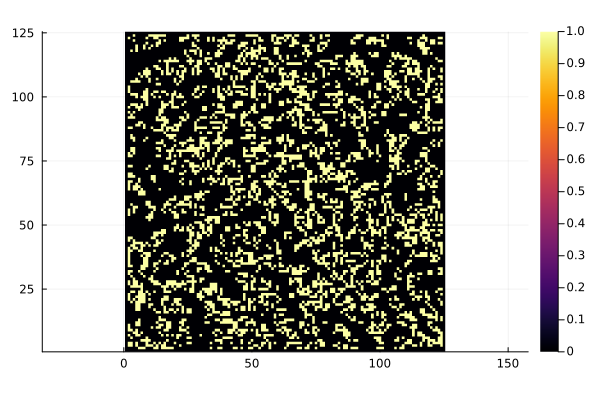

In [12]:
using Plots
(n,StepMax)=(123,3);
Board=zeros(Int64,n+2,n+2); Board[2:n+1,2:n+1]=rand((0,1),n,n)
Counts=zeros(Int64,n+2,n+2)
for step in 1:StepMax
    LifeStep(Board,Counts)
end
heatmap(Board,aspect_ratio=:equal)